In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
from os.path import expanduser

sys.path.append("{0}/repos/polso/strava/".format(expanduser("~")))

import pandas as pd
import datetime

from IPython.display import Markdown

from strava_dash import StravaScraper


`2nd to 8th September slot 1 Spring tide`

https://tides.mobilegeographics.com/locations/2089.html?y=2020&m=9&d=1


In [2]:
ec_distance = 33,796.2 / StravaScraper.M_TO_YD
ec_distance

(33, 728.047475791187)

In [6]:
%%capture
training = StravaScraper()
training.get_swims(after='2021-01-01', before='2021-09-10')
training.get_xtraining(after='2021-01-01', before='2021-09-10')

2021-01-10 10:12:21.173 | INFO     | stravaio:strava_oauth2:343 - serving at port 8000
2021-01-10 10:12:23.705 | DEBUG    | stravaio:run_server_and_wait_for_token:397 - code: f0a0fde890ef8da684deea37de06b99773b1cef0
2021-01-10 10:12:24.123 | DEBUG    | stravaio:run_server_and_wait_for_token:406 - Authorized athlete: c53830fc3aed4e66d0b846d9fa853a116f1cec33


## The Plan

| Month    | Days |  Yds/Week  |    X-Train Sesh   |  Running miles  |
| :------- |:---: | :--------: | :---------------: | :-------------: |
| January  | 31   |   25,000   |    5    |    |
| February | 28   |   30,000   |    5    |    |
| March    | 31   |   30,000   |    5    |    |
| April    | 31   |   35,000   |    3-4  |    |
| May      | 31   |   25,000   |    3-4    |    |
| June     | 30   |   25,000   |    5    |    |
| July     | 31   |   20,000   |    3-4    |    |
| August   | 31   |   15.000   |   Yoga    |    |

## The Execution

In [7]:
from IPython.display import Markdown

Markdown("""
##### Total Yards: {0} 
""".format(training.total_yards))


##### Total Yards: 20757 


In [8]:
training.monthly_yardage

,distance,hours,weekly distance
start_date,,,
January,20757.4,8.513333,5189.35


In [9]:
avg_x_train = training.x_training.groupby(['ds_week_ending', 
                                           'month']).count().reset_index().groupby(
    'month').activity.mean()
avg_x_train.index = avg_x_train.index.map(lambda x: datetime.date(1900, x, 1).strftime('%B'))

training.monthly_yardage.merge(
    pd.DataFrame({'avg_x_train': avg_x_train}), right_index=True, left_index=True).loc[['December', 'January', 
                                                                                        'February', 'March', 'April', 
                                                                                        'May', 'June', 'July',
                                                                                        'August']]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  # Remove the CWD from sys.path while we load stuff.


,distance,hours,weekly distance,avg_x_train
start_date,,,,
December,NaN,NaN,NaN,NaN
January,20757.4,8.513333,5189.35,1.0
February,NaN,NaN,NaN,NaN
March,NaN,NaN,NaN,NaN
April,NaN,NaN,NaN,NaN
May,NaN,NaN,NaN,NaN
June,NaN,NaN,NaN,NaN
July,NaN,NaN,NaN,NaN
August,NaN,NaN,NaN,NaN


## Yards

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

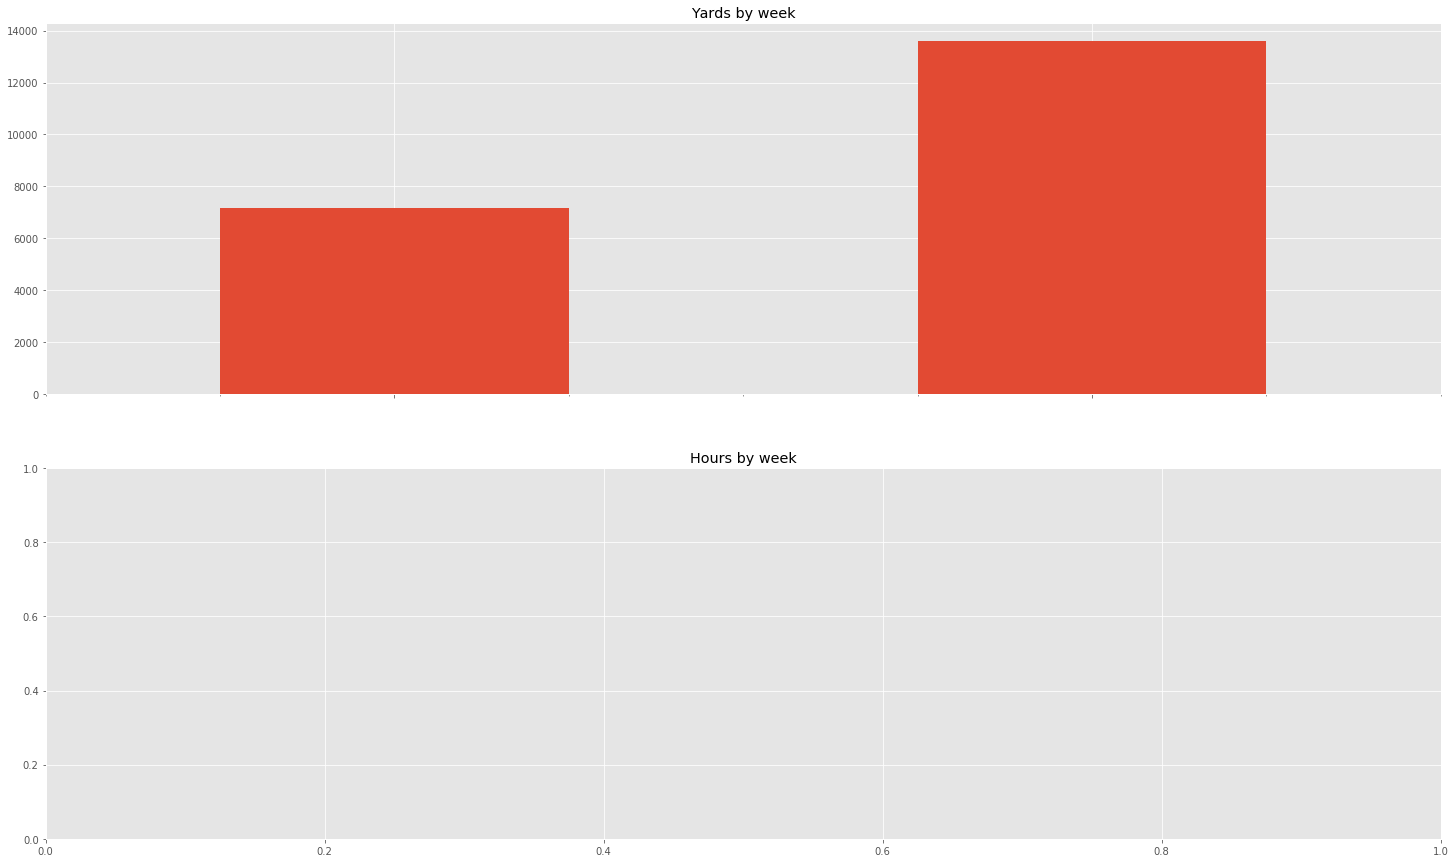

In [10]:
tmp = training.plot_summary(yardage_goal=ec_distance)

## In N Out

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:253: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  data = data.fillna(fillna)


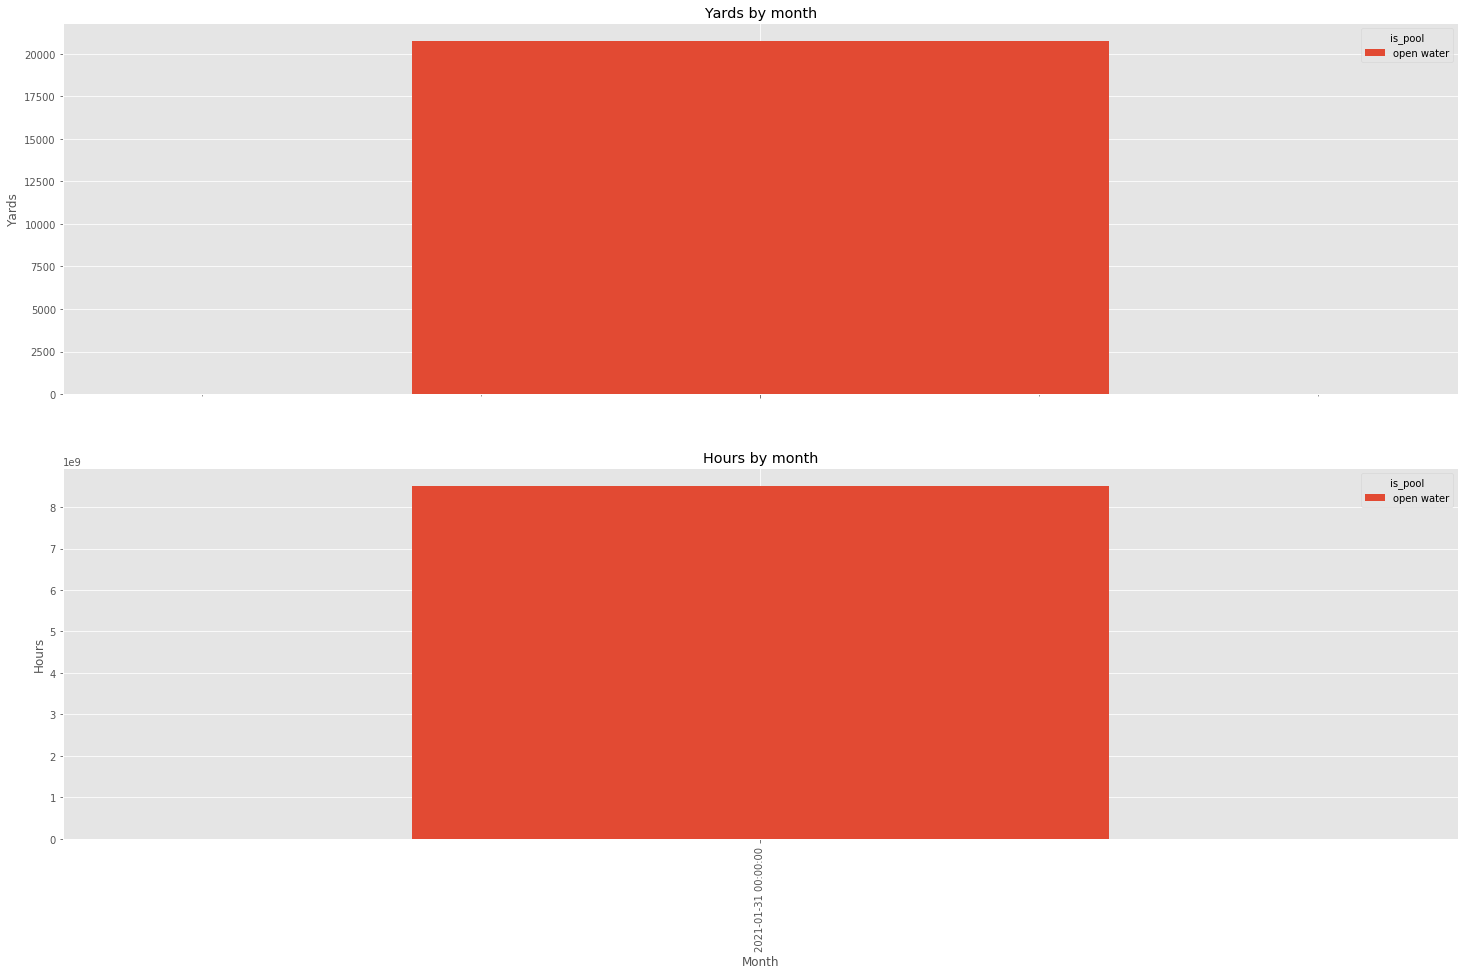

In [11]:
tmp = training.plot_summary(in_n_out=True, by='month')

## Crosstraining

In [12]:
training.x_training.activity.unique()

array(['Run'], dtype=object)

In [12]:
swims = training.swims
swims['activity'] = swims['is_pool'].apply(lambda x: {'open water': 'OpenWater', 'pool':'Pool'}[x])
full_training = pd.concat([swims[training.x_training.columns], training.x_training])
full_training.groupby('activity')['elapsed_time'].sum().apply(lambda x: x / 3600)

activity
OpenWater         0 days 00:01:53.889166
Pool                     0 days 00:00:09
Rowing                          0.166667
Run                              24.5367
VirtualRun                      0.833333
WeightTraining                     16.25
Workout                               12
Yoga                                   1
Name: elapsed_time, dtype: object

In [13]:
full_training.groupby(['ds_month_ending', 'activity'])['elapsed_time'].sum().apply(lambda x: x / 3600).unstack()

activity,OpenWater,Pool,Rowing,Run,VirtualRun,WeightTraining,Workout,Yoga
ds_month_ending,,,,,,,,
2019-11-30,00:00:13.847222,00:00:00.500000,NaN,4.68139,NaN,4,NaN,NaN
2019-12-31,00:00:03.693888,NaT,NaN,1.52278,NaN,1,NaN,NaN
2020-01-31,00:00:10.409444,00:00:04.333333,NaN,0.804722,0.833333,3.75,NaN,NaN
2020-02-29,00:00:24.779722,00:00:04.166666,0.166667,0.371389,NaN,1,NaN,1
2020-03-31,00:00:08.941944,NaT,NaN,7.07361,NaN,4.5,0.333333,NaN
2020-04-30,NaT,NaT,NaN,5.43722,NaN,2,5,NaN
2020-05-31,00:00:05.099722,NaT,NaN,1.17056,NaN,NaN,5.66667,NaN
2020-06-30,00:00:10.473055,NaT,NaN,1.64694,NaN,NaN,1,NaN
2020-07-31,00:00:22.359166,NaT,NaN,0.854167,NaN,NaN,NaN,NaN


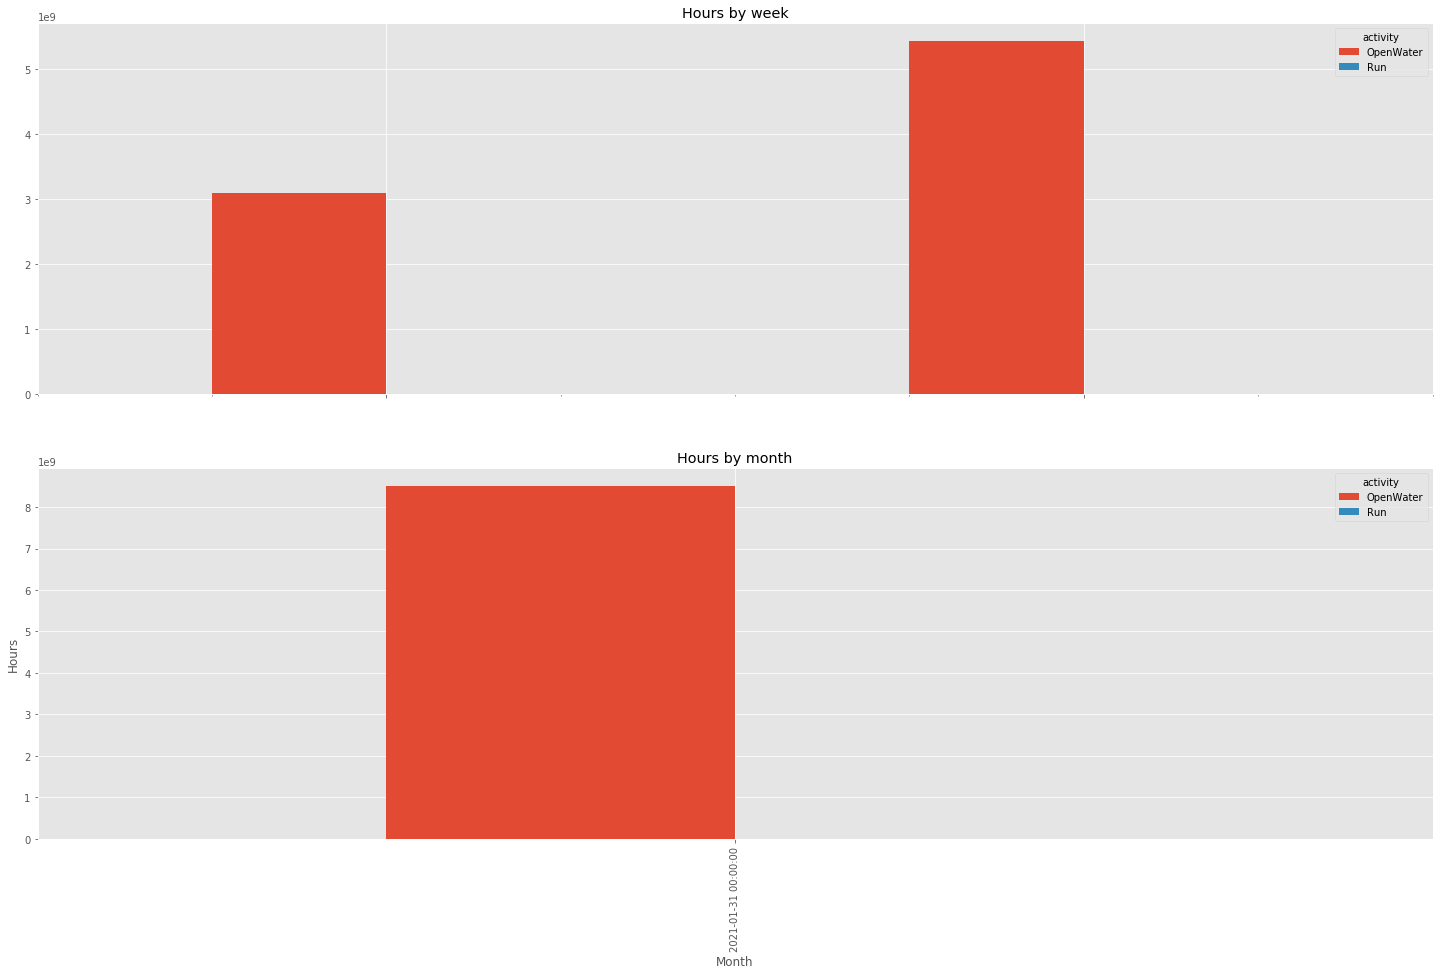

In [13]:
tmp=training.plot_x_training()

### Year on Year

In [21]:
%%capture
training_old = StravaScraper()
training_old.get_swims(after='2017-11-01', before='2018-09-30')

In [22]:
Markdown("""
##### Year on Year: 2018/2019 = {0:%} 2017/2018
""".format(training.total_yards / float(training_old.total_yards)))  


##### Year on Year: 2018/2019 = 69.332457% 2017/2018


In [23]:
training.in_out / training_old.in_out

,total,percentage
is_pool,,
open water,0.894654,1.290384
pool,0.234299,0.337935


2021-01-10 10:13:12.969 | INFO     | stravaio:strava_oauth2:343 - serving at port 8000


KeyboardInterrupt: 

In [16]:
training_years

NameError: name 'training_years' is not defined

# Appendix Full Training

In [15]:
from IPython.display import HTML
HTML(training.get_full_training().to_html())

,ds_week_ending,name,distance,hours,activity
start_date,,,,,
2019-11-02 11:19:03-07:00,2019-11-03,Running in Sin City,5290.010292,0.543611,Run
2019-11-04 06:10:00-08:00,2019-11-10,EC 2020: so it begins,2671.400000,0 days 00:00:00.923055,open water
2019-11-05 17:30:08-08:00,2019-11-10,Quadruple 7!,0.000000,1,WeightTraining
2019-11-06 06:16:05-08:00,2019-11-10,Swimming into dogs,2856.400000,0 days 00:00:00.985833,open water
2019-11-07 18:00:59-08:00,2019-11-10,Run with huckleberry!,14378.674919,1.3,Run
2019-11-07 20:46:13-08:00,2019-11-10,Run home,1499.011227,0.135556,Run
2019-11-09 07:47:09-08:00,2019-11-10,That seal needs an intervention,4751.700000,0 days 00:00:02.080833,open water
2019-11-11 06:16:32-08:00,2019-11-17,Best way to start the week!,2495.000000,0 days 00:00:00.975000,open water
2019-11-12 17:10:01-08:00,2019-11-17,Still a bit achey,3103.555819,0.281389,Run
